In [1]:
# %load cp_imports.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'


In [36]:
def gauss_solver(coefficient):
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension):
        coefficient[i] = coefficient[i] / coefficient[i, i]
        for j in range(i+1, dimension):
            coefficient[j] = coefficient[j] - coefficient[j, i] / coefficient[i, i] * coefficient[i]

    # Solve xi in reverse order 
    for i in range(-1, -dimension-1, -1):
        varibles[i] = coefficient[i, -1] - sum(coefficient[i, :-1] * varibles)
    
    return varibles

# Attention for integer matrix, set dtype to float explictly 
coefficient = np.array([[2, 1, 4, 1, -4], [3, 4, -1, -1, 3],
                        [1, -4, 1, 5, 9], [2, -2, 1, 3, 7]], dtype="float")
print(gauss_solver(coefficient))

[ 2. -1. -2.  1.]


In [37]:
nodes = np.array([[4, -1, -1, -1, 5],
                  [-1, 3, 0, -1, 0], 
                  [-1, 0, 3, -1, 5], 
                  [-1, -1, -1, 4, 0]], dtype="float")

print(*gauss_solver(nodes), sep=", ")

3.0, 1.6666666666666667, 3.3333333333333335, 2.0


In [9]:
def gauss_solver_column_pivot(coefficient):
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension):
        # Find index of max of i-th column
        pivot_row_index = np.argmax(abs(coefficient[:, i]))
        # Switch two rows
        coefficient[i], coefficient[pivot_row_index] = coefficient[pivot_row_index], coefficient[i]
        coefficient[i] = coefficient[i] / coefficient[i, i]
        for j in range(i+1, dimension):
            coefficient[j] = coefficient[j] - coefficient[j, i] / coefficient[i, i] * coefficient[i]

    # Solve xi in reverse order 
    for i in range(-1, -dimension-1, -1):
        varibles[i] = coefficient[i, -1] - sum(coefficient[i, :-1] * varibles)
    
    return varibles

In [44]:
gauss_solver_column_pivot(nodes)

array([3.        , 1.66666667, 3.33333333, 2.        ])

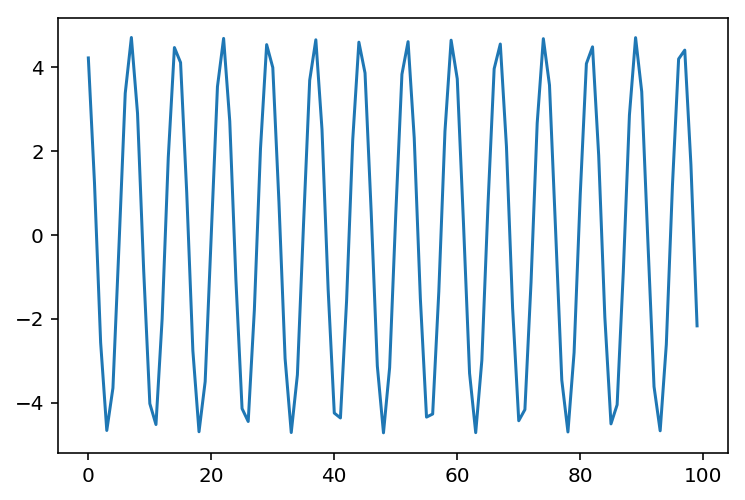

In [17]:
def gauss_solver_strip(coefficient):
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension-1):
        coefficient[i] = coefficient[i] / coefficient[i, i]
        coefficient[i+1] = coefficient[i+1] - coefficient[i+1, i] / coefficient[i, i] * coefficient[i]

    # Solve xi in reverse order 
    for i in range(-1, -dimension-1, -1):
        varibles[i] = coefficient[i, -1] - sum(coefficient[i, :-1] * varibles)
    
    return varibles
        
m, c, k, w, a = 1, 1, 6, 2, 8
test_oc = np.zeros((100, 101), dtype="float")
np.fill_diagonal(test_oc, a)
np.fill_diagonal(test_oc[1:,:], -k)
np.fill_diagonal(test_oc[:,1:], -k)
test_oc[[0, -1], [0, -2]] = test_oc[[0, -1], [0, -2]] - k 
test_oc[-1, -1] = 0
test_oc[0, -1] = c

test_x = gauss_solver_strip(test_oc)

plt.plot(test_x)

In [16]:
tegauss_solver_strip(test_oc)

array([ 4.22496987,  1.24165662, -2.56942771, -4.66756023, -3.65398594,
       -0.20442102,  3.38142458,  4.71298712,  2.90255825, -0.84290946,
       -4.02643752, -4.52567391, -2.00779436,  1.84861477,  4.47261405,
        4.11487063,  1.01388012, -2.76303046, -4.69792074, -3.50086386,
        0.03010226,  3.54100021,  4.69123135,  2.71397492, -1.07259812,
       -4.14410575, -4.45287621, -1.79306253,  2.06212617,  4.54256409,
        3.99462595,  0.78360385, -2.94982082, -4.71669828, -3.33911021,
        0.26455133,  3.69184532,  4.6579091 ,  2.51870014, -1.29964224,
       -4.25155646, -4.36909971, -1.57390982,  2.27055328,  4.6013142 ,
        3.86453231,  0.55139556, -3.12933824, -4.72384654, -3.16912382,
        0.49834812,  3.83358798,  4.61310252,  2.31721538, -1.52348201,
       -4.34852473, -4.27455096, -1.35087655,  2.47338223,  4.64871952,
        3.72491046,  0.31782777, -3.30114011, -4.71934791, -2.99132377,
        0.73091621,  3.96587872,  4.55692208,  2.11001739, -1.74

In [5]:
test_oc[[0, -1], [0, -2]]

array([2., 2.])

In [9]:
x

array([[0, 1, 2],
       [3, 0, 5]])